## Data Preprocessing
1. Pre-process file to trim start and end '"', replace '""' with '"' making it ready to be read as pandas data frame.
2. Checking and removing duplicate rows.
3. Impute column 'Description': Modify product code with multiple descriptions with most occurrence product code description. Rest impute 'missing_description' for None description.
4. Impute column 'Customer_ID': Imputing Customer_ID failed with no common transaction id with and without Customer_ID. impute 'missing_cust_id_{invoice number}' for None Customer_ID making all None transaction unique and individual transactions.
5. Identify the cancellation transaction from order quantity with a negative value and remove then from customer segmentation.
6. Calculate Amount_Spent as Quantity * Unit_Price.

## EDA
1. Top-n customer with the highest money spent
2. Top-n customer with the highest number of order
3. Top-n countries with most order
4. Top-n countries with the most revenue
5. Top-5 countries with top-3 customer id as per the total number of order
6. Number of orders per year
6. Number of orders per month
7. Number of orders per date
8. Number of orders per day
8. Number of order per hour
9. Top-n product code with most order
10. Top-n product code with the most revenue
11. Unit price univariate plot
12. Product code analysis with different countries
13. number of the unique customer with different countries
14. number of unique product code with different countries
15. Univariate analysis for number of transaction from individual customers

## Data Insights
1. Among all transactions around 20% of transactions are of cancellation.
2. Most of the countries have a successful transaction rate in between 65% to 85%, Chec Republic has the worst successful transaction rate. Successful Transaction Rate is defined as below:
Successful Transaction Rate = ([TotalCheckout-TotalCancellation]/[TotalCheckout]))*100
3. Most numbers of transactions are from United Kingdom followed by Germany & France
4. Most revenue is from United Kingdom followed by Netherland which has fewer unique transactions then Germany & France.
5. Most of the transactions are from the year 2011 with few from 2010.
6. A number of transactions are greater in second half of the year than the first half.
7. A number of transactions are higher towards the beginning of the month them towards the end of the month.
8. No transaction on Saturday could be weekly off on that day.
9. 12 p.m. lunchtime seems to be attracting more unique transactions & majority of transactions on a given day are between 8 a.m. to 7 p.m.
10. Number of Transaction for Products are not identical from the United Kingdom to other top 9 countries.
11. United Kingdom has the most number of unique users.
12. Number of unique products having transactions in the United Kingdom is higher than that of other countries.
13. Lot of customers have transacted in between 50-200 times with the platform

In [2]:
import re
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
glob.glob('data/ML*.txt')

['data\\ML Data.txt', 'data\\ML Data_new.txt']

In [4]:
source_file = 'data\\ML Data.txt'
dest_file =  'data\\ML Data_new.txt'
with open (source_file, "r") as infile:
    all_lines = infile.readlines()
with open (dest_file, "w+") as outfile:
    _RE_COMBINE_ = re.compile(r'"+')
    lines = [_RE_COMBINE_.sub('"', line.strip()[1:-1]) for line in all_lines]
    outfile.writelines("%s\n" % l for l in lines)

In [5]:
df = pd.read_csv(dest_file, encoding='latin1', dtype = {'Invoice_Number':'string', 'Product_Code': 'string', 'Description': 'string', 'Quantity': 'int',
       'Invoice_Date':'string', 'Unit_Price':'float', 'Customer_ID':'string', 'Country':'string'})
df.Invoice_Date = pd.to_datetime(df.Invoice_Date)
print(df.shape)
print(df.columns)
display(df.head())

(541909, 8)
Index(['Invoice_Number', 'Product_Code', 'Description', 'Quantity',
       'Invoice_Date', 'Unit_Price', 'Customer_ID', 'Country'],
      dtype='object')


,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
df.dtypes

Invoice_Number            string
Product_Code              string
Description               string
Quantity                   int32
Invoice_Date      datetime64[ns]
Unit_Price               float64
Customer_ID               string
Country                   string
dtype: object

In [7]:
df.describe(exclude=[np.number])

,Invoice_Number,Product_Code,Description,Invoice_Date,Customer_ID,Country
count,541909,541909,540455,541909,406829,541909
unique,25900,4070,4223,23260,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,17841,United Kingdom
freq,1114,2313,2369,1114,7983,495478
first,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN
last,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN


### Check for duplicate & remove

In [8]:
df.drop_duplicates(inplace=True)
print(df.shape)

(536641, 8)


### Check for occurance of None

In [9]:
df.isna().sum()

Invoice_Number         0
Product_Code           0
Description         1454
Quantity               0
Invoice_Date           0
Unit_Price             0
Customer_ID       135037
Country                0
dtype: int64

### Univariate analysis of product quantity
1. Number of transaction vs cancellation
2. Number of transaction vs cancellation per country
3. Remove cancellation transaction

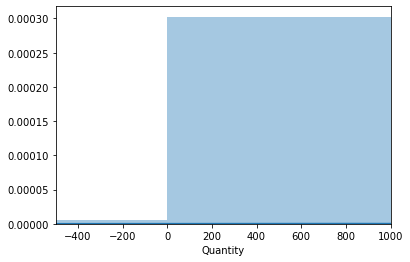

In [10]:
sns.distplot(df.Quantity)
plt.xlim(-500, 1000)
plt.show()

In [11]:
df['Cancellation'] = df.Quantity<0
df.loc[df.Cancellation==True].head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Cancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,True


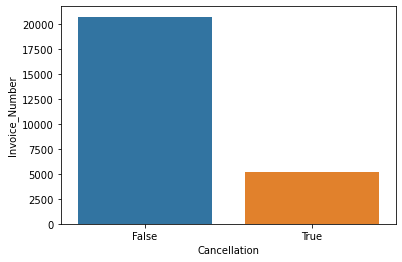

In [12]:
temp_df = df.groupby([df.Cancellation])['Invoice_Number'].nunique().reset_index()
sns.barplot(x='Cancellation',y='Invoice_Number', data=temp_df)

In [13]:
temp_df['Invoice_Number']/sum(temp_df['Invoice_Number'])

0    0.800309
1    0.199691
Name: Invoice_Number, dtype: float64

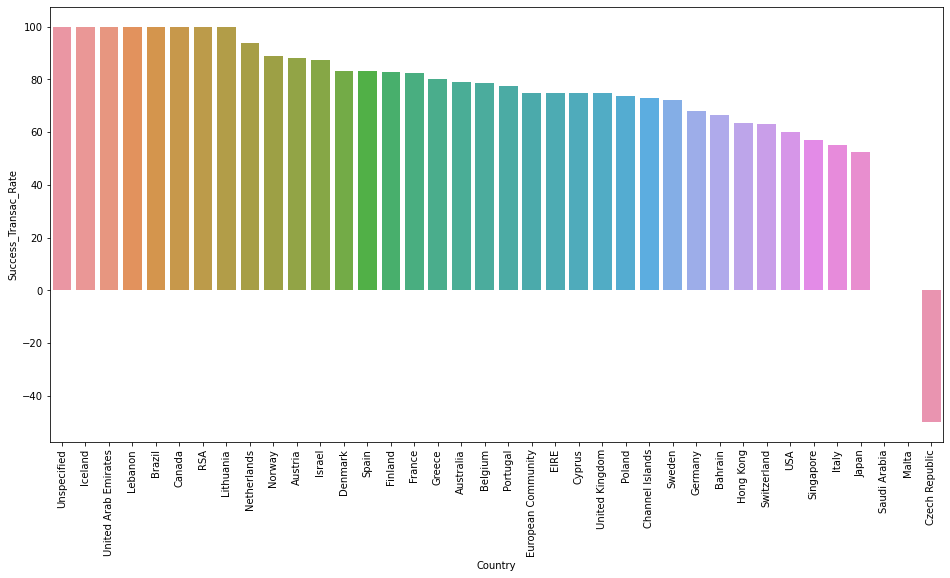

In [14]:
temp_df = df.groupby([df.Cancellation, df.Country])['Invoice_Number'].nunique().reset_index()

temp_df = temp_df.pivot(index='Country', columns='Cancellation', values='Invoice_Number')
temp_df.columns = temp_df.columns.map(lambda x: f'Cancellation_{x}')
temp_df = temp_df.reset_index()
temp_df = temp_df.fillna(0)
temp_df['Success_Transac_Rate'] = ((temp_df.Cancellation_False-temp_df.Cancellation_True)/temp_df.Cancellation_False)*100
plt.figure(figsize=(16, 8))
sns.barplot(x='Country',y='Success_Transac_Rate', data=temp_df, order=temp_df.sort_values('Success_Transac_Rate', ascending=False).Country)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [15]:
print(df.loc[df.Cancellation==True].shape)
df.loc[df.Cancellation==True].head()

(10587, 9)


,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Cancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,True


In [16]:
df = df.loc[df.Cancellation==False]
print(df.shape)

(526054, 9)


In [17]:
print(df.loc[df.Cancellation==True].shape)
df.loc[df.Cancellation==True].head()

(0, 9)


,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Cancellation


### Imputing missing product description: 
1. With multi product description replace product description with the most the occurrence description
2. Impute missing description for remaining blank product description

In [18]:
df.Description.isna().sum()

592

In [19]:
df.groupby(['Product_Code'])['Description'].nunique().sort_values(ascending=False)

Product_Code
20713     6
23084     6
23209     4
21181     4
23131     4
         ..
35951     0
62095B    0
20950     0
72803B    0
84971L    0
Name: Description, Length: 3941, dtype: int64

In [20]:
product_desc_mapping_df = pd.DataFrame(df.groupby(['Product_Code', 'Description'])['Invoice_Number'].nunique().reset_index()).sort_values(['Product_Code', 'Invoice_Number'], ascending=False).groupby('Product_Code').head(1).drop('Invoice_Number', axis=1)
product_desc_mapping_df.head()

,Product_Code,Description
4318,m,Manual
4317,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00
4316,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00
4315,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00
4313,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00


In [21]:
df = pd.merge(df.drop('Description', axis=1), product_desc_mapping_df, how='outer')
df.loc[df.Description.isna(), 'Description'] = 'missing_description'

In [22]:
df.Description.isna().sum()

0

In [23]:
df.groupby(['Product_Code'])['Description'].nunique().sort_values(ascending=False)

Product_Code
m         1
22432     1
22430     1
22429     1
22428     1
         ..
44242A    1
44236     1
44235     1
44234     1
10002     1
Name: Description, Length: 3941, dtype: int64

## Imputing missing Customer_ID:
1. Checks to find if missing Customer_ID can be found with any matching invoice number.
2. Check if any particular country exhibits missing Customer_ID.
3. Impute missing customer id as unique customer as per their available transaction id

In [24]:
df.loc[df.Invoice_Number.isin(df.loc[df.Customer_ID.isna(), 'Invoice_Number'].unique())].Customer_ID.unique()

<StringArray>
[<NA>]
Length: 1, dtype: string

In [25]:
df.Country.value_counts()/len(df)

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [26]:
df.loc[df.Customer_ID.isna(), 'Country'].value_counts()/len(df.Customer_ID.isna())

United Kingdom    0.250765
EIRE              0.001245
Hong Kong         0.000532
Unspecified       0.000382
Switzerland       0.000222
France            0.000125
Israel            0.000089
Portugal          0.000074
Bahrain           0.000002
Name: Country, dtype: float64

In [27]:
df.loc[df.Customer_ID.isna() & df.Country.isin(['United Kingdom']), :]

,Invoice_Number,Product_Code,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Cancellation,Description
11,536544,85123A,4,2010-12-01 14:32:00,5.91,<NA>,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
15,536592,85123A,9,2010-12-01 17:06:00,5.91,<NA>,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
39,536876,85123A,5,2010-12-03 11:36:00,5.91,<NA>,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
56,537237,85123A,2,2010-12-06 09:58:00,5.91,<NA>,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
58,537240,85123A,9,2010-12-06 10:08:00,5.91,<NA>,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
...,...,...,...,...,...,...,...,...,...
526046,581492,23561,1,2011-12-09 10:03:00,5.79,<NA>,United Kingdom,False,SET OF 6 RIBBONS PARTY
526048,579187,23609,1,2011-11-28 15:31:00,2.91,<NA>,United Kingdom,False,SET 10 CARDS SNOWY ROBIN 17099
526049,579297,85179a,1,2011-11-29 11:23:00,2.46,<NA>,United Kingdom,False,GREEN BITTY LIGHT CHAIN
526050,579512,23617,2,2011-11-29 16:47:00,2.91,<NA>,United Kingdom,False,SET 10 CARDS SWIRLY XMAS TREE 17104


In [28]:
df.loc[df.Customer_ID.isna(), 'Customer_ID'] = 'missing_cust_id_'+df.loc[df.Customer_ID.isna(), 'Invoice_Number']
df.head(14)

,Invoice_Number,Product_Code,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,Cancellation,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,6,2010-12-01 09:32:00,2.55,17850,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,64,2010-12-01 10:19:00,2.55,17511,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,32,2010-12-01 10:39:00,2.55,13408,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
5,536396,85123A,6,2010-12-01 10:51:00,2.55,17850,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
6,536401,85123A,4,2010-12-01 11:21:00,2.95,15862,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
7,536406,85123A,8,2010-12-01 11:33:00,2.55,17850,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
8,536502,85123A,6,2010-12-01 12:36:00,2.95,16552,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER
9,536520,85123A,3,2010-12-01 12:43:00,2.95,14729,United Kingdom,False,WHITE HANGING HEART T-LIGHT HOLDER


### Amount Spent= Quantity * Unit_price

In [29]:
df.loc[:, 'Amount_Spent'] = df.Quantity * df.Unit_Price

### Top-n customer with highest money spent

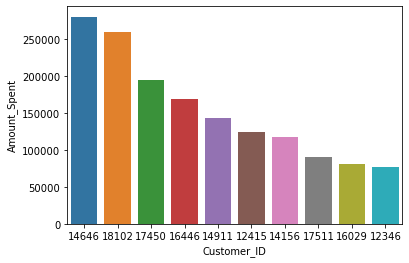

In [30]:
temp_df = df.groupby(['Customer_ID'])['Amount_Spent'].sum().sort_values(ascending=False).iloc[0:10].reset_index()
sns.barplot(x='Customer_ID', y="Amount_Spent", data=temp_df, order=temp_df.sort_values('Amount_Spent', ascending=False).Customer_ID)

### Top-n customer with highest number of order

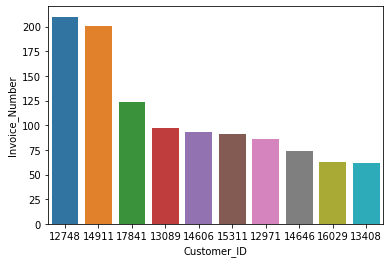

In [31]:
temp_df = df.groupby(['Customer_ID'])['Invoice_Number'].nunique().sort_values(ascending=False).iloc[0:10].reset_index()
sns.barplot(x='Customer_ID', y="Invoice_Number", data=temp_df, order=temp_df.sort_values('Invoice_Number', ascending=False).Customer_ID)

### Top-n countries with most order

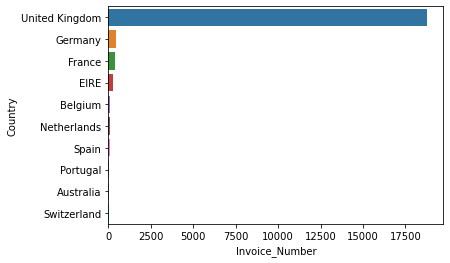

In [32]:
temp_df = df.groupby(['Country'])['Invoice_Number'].nunique().sort_values(ascending=False).iloc[0:10].reset_index()
sns.barplot(y='Country', x="Invoice_Number", data=temp_df)
plt.show()

### Top-n countries with most revenue

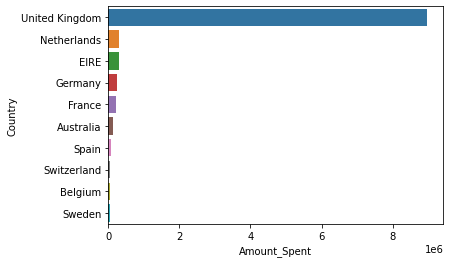

In [33]:
temp_df = df.groupby(['Country'])['Amount_Spent'].sum().sort_values(ascending=False).iloc[0:10].reset_index()
sns.barplot(y='Country', x="Amount_Spent", data=temp_df)
plt.show()

## Top-5 countries with top-3 customer id as per total number of order

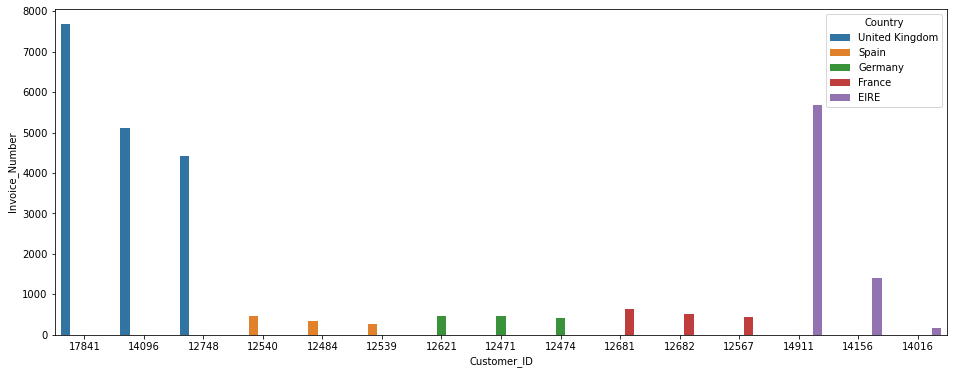

In [34]:
temp_df = df.loc[df.Country.isin(df.Country.value_counts().iloc[0:5].index.to_list())].groupby(['Country', 'Customer_ID']).count().reset_index().sort_values(['Country', 'Invoice_Number'], ascending=False).groupby('Country').head(3)
plt.figure(figsize=(16, 6))
sns.barplot(x='Customer_ID', y="Invoice_Number", hue='Country', data=temp_df, order=temp_df.sort_values(['Country','Invoice_Number'], ascending=False).Customer_ID)
plt.show()

### Number of orders per year

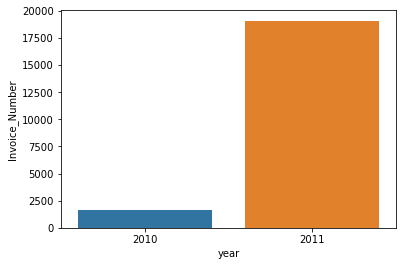

In [35]:
df['year'] = df.Invoice_Date.dt.year
temp_df = pd.DataFrame(df.groupby(['year'])['Invoice_Number'].nunique()).reset_index()
sns.barplot(y='Invoice_Number', x="year", data=temp_df)
plt.show()

### Number of orders per month

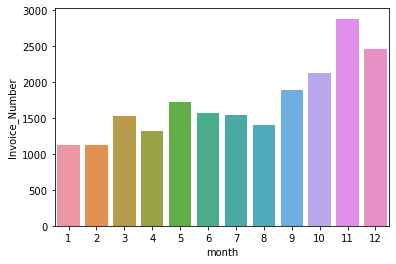

In [36]:
df['month'] = df.Invoice_Date.dt.month
temp_df = pd.DataFrame(df.groupby(['month'])['Invoice_Number'].nunique()).reset_index()
sns.barplot(y='Invoice_Number', x="month", data=temp_df)
plt.show()

### Number of orders per date

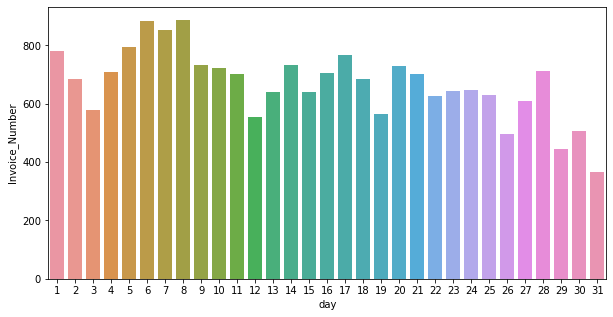

In [37]:
df['day'] = df.Invoice_Date.dt.day
plt.figure(figsize=(10, 5))

temp_df = pd.DataFrame(df.groupby(['day'])['Invoice_Number'].nunique()).reset_index()
sns.barplot(y='Invoice_Number', x='day', data=temp_df)
plt.show()

### Number of orders per day

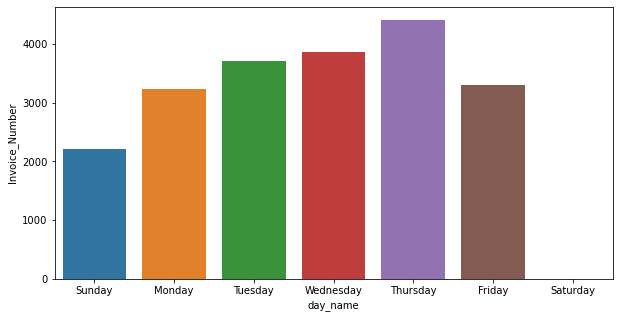

In [38]:
df['day_name'] = df.Invoice_Date.dt.day_name()
plt.figure(figsize=(10, 5))

temp_df = pd.DataFrame(df.groupby(['day_name'])['Invoice_Number'].nunique()).reset_index()
sns.barplot(y='Invoice_Number', x='day_name', data=temp_df, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

### Number of order per hour

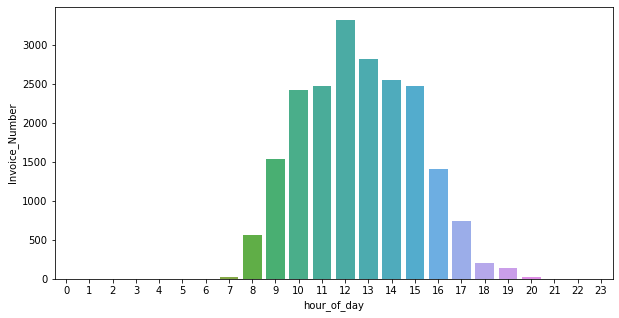

In [39]:
df['hour_of_day'] = df.Invoice_Date.dt.hour
plt.figure(figsize=(10, 5))

temp_df = pd.DataFrame(df.groupby(['hour_of_day'])['Invoice_Number'].nunique()).reset_index()
sns.barplot(y='Invoice_Number', x='hour_of_day', data=temp_df, order=range(24))
plt.show()

### Unit price univeriate plot
1. Check for outlier
2. Using suitable treatment try reducing effect of the outlier.

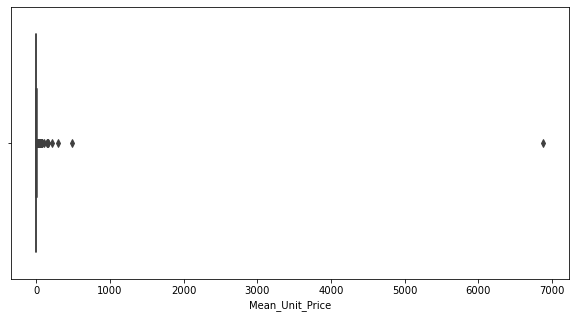

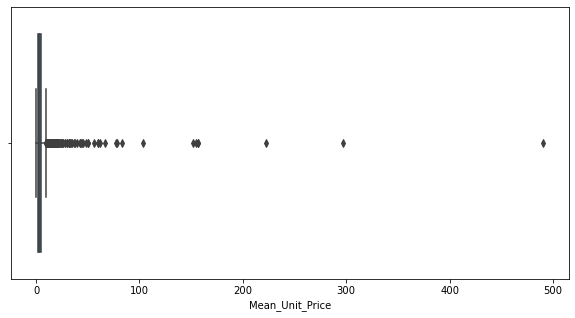

In [40]:
def list_mean(x):
    try:
        return sum(x) / len(x)
    except:
        print(x)
        return 0
    
temp_df = pd.DataFrame(df.groupby(['Product_Code'])['Unit_Price'].unique()).reset_index()
temp_df['Mean_Unit_Price'] = temp_df.Unit_Price.apply(lambda x: list_mean(x))
plt.figure(figsize=(10, 5))
sns.boxplot(temp_df.Mean_Unit_Price)
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(temp_df.loc[temp_df.Mean_Unit_Price<1000, 'Mean_Unit_Price'])
plt.show()

c:\users\srikant panda\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\srikant panda\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


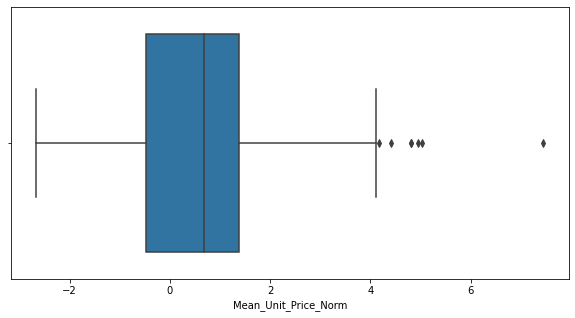

In [41]:
def list_mean(x):
    try:
        return sum(x) / len(x)
    except:
        print(x)
        return 0

df['Unit_Price_Norm'] = np.log(df['Unit_Price'])
temp_df = pd.DataFrame(df.groupby(['Product_Code'])['Unit_Price_Norm'].unique()).reset_index()
temp_df['Mean_Unit_Price_Norm'] = temp_df.Unit_Price_Norm.apply(lambda x: list_mean(x))
plt.figure(figsize=(10, 5))
sns.boxplot(temp_df.Mean_Unit_Price_Norm)
plt.show()

### Top-n product code most order

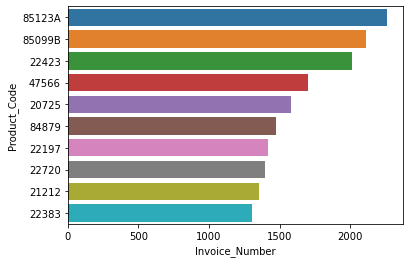

In [42]:
temp_df = df.groupby(['Product_Code'])['Invoice_Number'].count().sort_values(ascending=False).iloc[0:10].reset_index()
sns.barplot(y='Product_Code', x="Invoice_Number", data=temp_df)
plt.show()

### Top-n product code most revenue

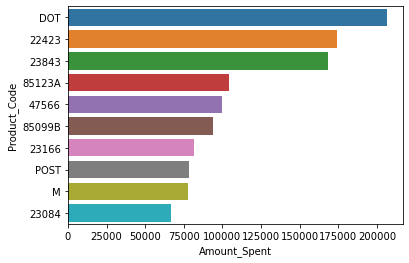

In [43]:
temp_df = df.groupby(['Product_Code'])['Amount_Spent'].sum().sort_values(ascending=False).iloc[0:10].reset_index()
sns.barplot(y='Product_Code', x="Amount_Spent", data=temp_df)
plt.show()

### Product code analysis with different countries

In [44]:
temp_df = pd.DataFrame()
for i in df.Country.value_counts().iloc[0:10].index.to_list():
    if len(temp_df)==0:
        temp_df = df.loc[df.Country==i, 'Product_Code'].value_counts(normalize=True).reset_index().rename({'index': 'Product_Code', 'Product_Code':f'Occ_{i}'}, axis=1)
    else:
        temp_df = pd.merge(temp_df, df.loc[df.Country==i, 'Product_Code'].value_counts(normalize=True).reset_index().rename({'index': 'Product_Code', 'Product_Code':f'Occ_{i}'}, axis=1), on = 'Product_Code', how='outer')
display(temp_df.head(20).style.bar(color='#d65f5f'))

,Product_Code,Occ_United Kingdom,Occ_Germany,Occ_France,Occ_EIRE,Occ_Spain,Occ_Netherlands,Occ_Belgium,Occ_Switzerland,Occ_Portugal,Occ_Australia
0,85123A,0.004496,0.000111,0.000357,0.005835,0.004435,0.002539,nan,0.002042,0.001340,0.000845
1,85099B,0.004067,0.003988,0.004647,0.001903,0.002016,0.005925,0.004924,0.001531,0.005362,0.003378
2,22423,0.003537,0.006979,0.005838,0.009134,0.008871,0.003809,0.007386,0.006126,0.003351,0.005068
3,47566,0.003342,0.000554,0.002621,0.002664,0.003226,0.000423,0.000985,0.002552,nan,0.006757
4,20725,0.002928,0.002216,0.007149,0.002030,0.003226,0.004232,0.005908,0.003063,0.009383,0.006757
5,84879,0.002893,0.001219,0.002025,0.002537,0.004839,0.000846,0.000492,0.002552,0.002681,nan
6,22197,0.002746,0.001219,0.002502,0.004440,0.004435,0.000423,0.000492,0.000510,nan,nan
7,22720,0.002598,0.002991,0.000953,0.004059,0.002823,0.001693,0.002954,nan,0.003351,0.007601
8,20727,0.002586,0.001219,0.001549,0.001015,0.002016,0.002539,0.000492,0.001021,nan,0.003378
9,22457,0.002546,0.000111,0.000119,0.001903,0.000403,nan,0.000985,nan,0.003351,0.000845


### Number of unique customer with different countries

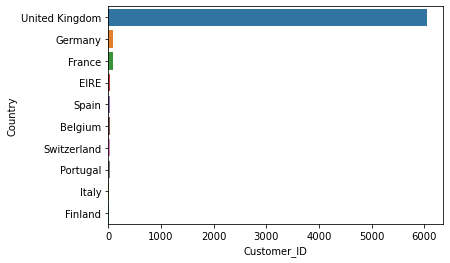

In [45]:
temp_df = df.groupby(['Country'])['Customer_ID'].nunique().sort_values(ascending=False).iloc[0:10].reset_index()
sns.barplot(y='Country', x="Customer_ID", data=temp_df)
plt.show()

### Number of unique product code with different countries

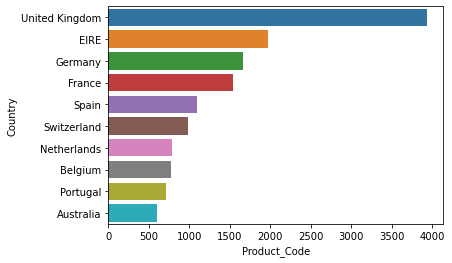

In [46]:
temp_df = df.groupby(['Country'])['Product_Code'].nunique().sort_values(ascending=False).iloc[0:10].reset_index()
sns.barplot(y='Country', x="Product_Code", data=temp_df)
plt.show()

### Distribution of unique transaction from customers

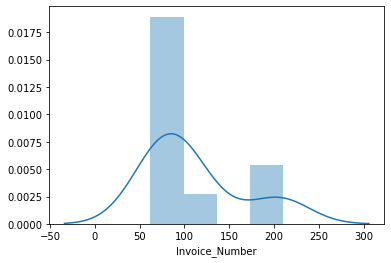

In [48]:
temp_df = df.groupby(['Customer_ID'])['Invoice_Number'].nunique().sort_values(ascending=False).iloc[0:10].reset_index()
sns.distplot(temp_df.Invoice_Number)